## Keras MNIST 示例

In [1]:
from __future__ import print_function
from keras.datasets import mnist

import numpy as np
import os

(x_train, y_train), (x_test, y_test) = mnist.load_data(os.getcwd() + '/mnist.npz')

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


60000 train samples
10000 test samples


In [2]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [3]:
print(y_train.shape)

(60000,)


In [4]:
from keras.utils import to_categorical

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), name='Dense_0'))
model.add(Dense(512, activation='relu', name='Dense_1'))
model.add(Dense(num_classes, activation='softmax', name='Dense_2'))

model.summary()

W0916 00:17:31.079978 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 00:17:31.110554 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 00:17:31.114179 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_0 (Dense)              (None, 512)               401920    
_________________________________________________________________
Dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
Dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


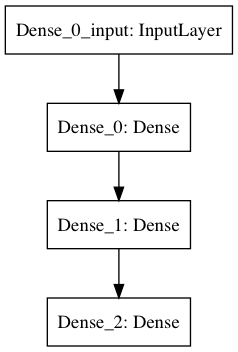

In [6]:
from keras.utils import plot_model

plot_model(model, to_file='mnist.png')

In [7]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0916 00:18:40.145906 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0916 00:18:40.169121 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0916 00:18:40.345365 140736253780864 deprecation.py:323] From /Users/django/.pyenv/Versions/3.6.8/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0916 00:18:40.521242 140736253780864 deprecation_wrapper.py:119] From /Users/django/.pyenv/Versions/3.6.8/lib/p

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2185 - acc: 0.9337 - val_loss: 0.1042 - val_acc: 0.9691
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0813 - acc: 0.9747 - val_loss: 0.0747 - val_acc: 0.9778
Epoch 3/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0541 - acc: 0.9829 - val_loss: 0.0839 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0385 - acc: 0.9880 - val_loss: 0.1048 - val_acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0773 - val_acc: 0.9807
Epoch 6/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0233 - acc: 0.9932 - val_loss: 0.1048 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0192 - acc: 0.9944 - val_loss: 0.

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11788165153480168
Test accuracy: 0.98


In [9]:
model.save('mnist.h5')